In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Libraries:**

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/Naya - Keren Rotem - Deep/rotem'
os.chdir(path)

### **Download the data:**

In [ ]:
! pip install -q kaggle

In [ ]:
os.chdir('../CSV')

In [ ]:
! kaggle competitions download nbme-score-clinical-patient-notes

  0% 0.00/9.83M [00:00<?, ?B/s]
100% 9.83M/9.83M [00:00<00:00, 143MB/s]


In [ ]:
! unzip nbme-score-clinical-patient-notes.zip

Archive:  nbme-score-clinical-patient-notes.zip
  inflating: features.csv            
  inflating: patient_notes.csv       
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
os.chdir(path)

### **A little bit of EDA:**

* **first of all we should examine the  dataset:**

<span style="color:red"> </span>

In [4]:
df_features = pd.read_csv('../CSV/features.csv', encoding = 'utf-8')
df_notes = pd.read_csv('../CSV/patient_notes.csv', encoding = 'utf-8')
df_train = pd.read_csv('../CSV/train.csv', encoding = 'utf-8')
df_test = pd.read_csv('../CSV/test.csv', encoding = 'utf-8')

#### *features.csv*

* **Let's take a brief look at the data.**

In [96]:
df_features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [ ]:
df_features.loc[0, 'feature_text']

'Family-history-of-MI-OR-Family-history-of-myocardial-infarction'

* `feature_num` - A unique identifier for 
each feature.
* `case_num` - A unique identifier for each case.
*  `feature_text` - A description of the feature.


In [ ]:
df_features.nunique()

feature_num     143
case_num         10
feature_text    131
dtype: int64

* **Thre are 143 feutures but only 131 unique text. We should check NaN values and duplications.**


In [43]:
df_features.case_num.value_counts()

5    18
8    18
2    17
9    17
3    16
0    13
1    13
6    12
4    10
7     9
Name: case_num, dtype: int64

* **For each patient there are a few features. We may think it is weird that the features are related to each patients, so maybe there are duplications, or we may reveal something else.**

In [27]:
id_na_feat_text = list(df_features.loc[pd.isna(df_features.feature_text), :].index)
id_na_feat_text

[]

In [31]:
i  =  sum(pd.isna(df_features.feature_text) == True)
i

0

* **Hence, there are duplicates.**

In [41]:
id_du_feat_text = list(df_features.loc[df_features.feature_text.duplicated(keep=False), :].index)
df_features.iloc[id_du_feat_text]

,feature_num,case_num,feature_text
11,11,0,17-year
12,12,0,Male
17,104,1,20-year
25,112,1,Female
34,208,2,Female
51,308,3,Male
57,314,3,Nausea
58,315,3,35-year
66,407,4,Female
70,501,5,Female


<b> 
* We can infer that the 10 cases are very different from each other, Since there are no duplications in clinical diagnosis, except of gender, age and nausea.
* We should pay attention later in the train dataframe whether this duplication appears in the clasifiaction/target. It may disturt the results.
</b>

#### *patient_notes.csv*

In [ ]:
df_notes.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [ ]:
print(df_notes.loc[0, 'pn_history'])

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std


In [51]:
print(df_notes.loc[2, 'pn_history'])

Dillon Cleveland is a 17 y.o. male patient with no significant PMH who presents with complaints of heart pounding. This has been going on for a few months and happens once or twice a month. He cannot think of any triggers, and it has occurred both with activity and at rest. Occasionally, it is accompanied by chest pressure but not pain that is located at the center of his chest. On one instance, he experienced chest pressure, lightheadedness and shortness of breath for 10 minutes with the heart pounding. 

Otherwise, he has not had shortness of breath, chest pain, anxiety, 

Medication: adderall twice a week as study aid (not prescribed)
FH: mother - thyroid disease, father - heart attack at age 52, both living
SH: no smoking; 3-4 drinks on the weekend per sitting; marijuanna once recently, no other recreational drugs


* `pn_num` - A unique identifier for each patient note.
* `case_num` - A unique identifier for the clinical case a patient note represents.
* `pn_history` - The text of the encounter as recorded by the test taker.

In [49]:
df_notes.groupby(['case_num']).pn_num.count()

case_num
0    2268
1     808
2    1958
3    9753
4    5405
5    6909
6    1597
7    4101
8    4196
9    5151
Name: pn_num, dtype: int64

<b>Let's examine: 
* the distibution of the notes' length.
* fgfhgf 
</b> 

#### *train.csv*

In [12]:
df_train.head(10)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
5,00016_005,0,16,5,[],[]
6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']"
7,00016_007,0,16,7,[],[]
8,00016_008,0,16,8,[],[]
9,00016_009,0,16,9,"['palpitations', 'heart beating/pounding']","['26 38', '96 118']"


* **Let's look at the distribution of the extracted features of each pn_num (meaning, each MED student)**

In [ ]:
fig, ax = plt.subplots(ncols= 2, nrows =5, figsize = (14,14), constrained_layout = True)
index = 0
ax = ax.flatten()
dic_sel = {}

for i in np.arange(10):
  case_i = df_train[df_train.case_num == i]
  case_i = case_i[case_i.annotation != '[]']
  a = case_i.groupby(['feature_num']).pn_num.count()
  a.plot(kind='bar', ax=ax[index]).set_title(f"Case {i}", fontsize=13)
  ax[index].set_xlabel('features', weight="bold")
  ax[index].set_ylabel("frequency", weight="bold")
  index += 1
  a = pd.Dataframe(a)
  dic_sel[i] = a.loc(a.pn_num<25)

print(dic_sel)

AttributeError: ignored

<b> 
* We can see that for every case, there are features that almost never detected, or seldomely.
* We want to take a deeper look at the annotation indluded in each feature.

In [60]:
dic_ann = {}
for i in np.arange(10):
  case_i = df_train[df_train.case_num == i]
  case_i = case_i[case_i.annotation != '[]']
  dic_ann[i] = {}
  for j in case_i.index:
    a = case_i.loc[j,'feature_num']
    if a not in dic_ann[i]:
      dic_ann[i][a] = [case_i.loc[j,'annotation']]
    elif len(dic_ann[i][a])<10:
      dic_ann[i][a].append([case_i.loc[j,'annotation']])

In [62]:
dic_ann[0][2]

["['chest pressure']",
 ["['PRESSURE ON HER CHEST']"],
 ["['chest pressure']"],
 ["['pressure over chest']"],
 ["['chest pressure']"],
 ["['chest pressure']"],
 ["['chest pressure']"],
 ["['chest pressure']"],
 ["['midsternal pressure']"],
 ["['chest tightness', 'chest tightness']"]]

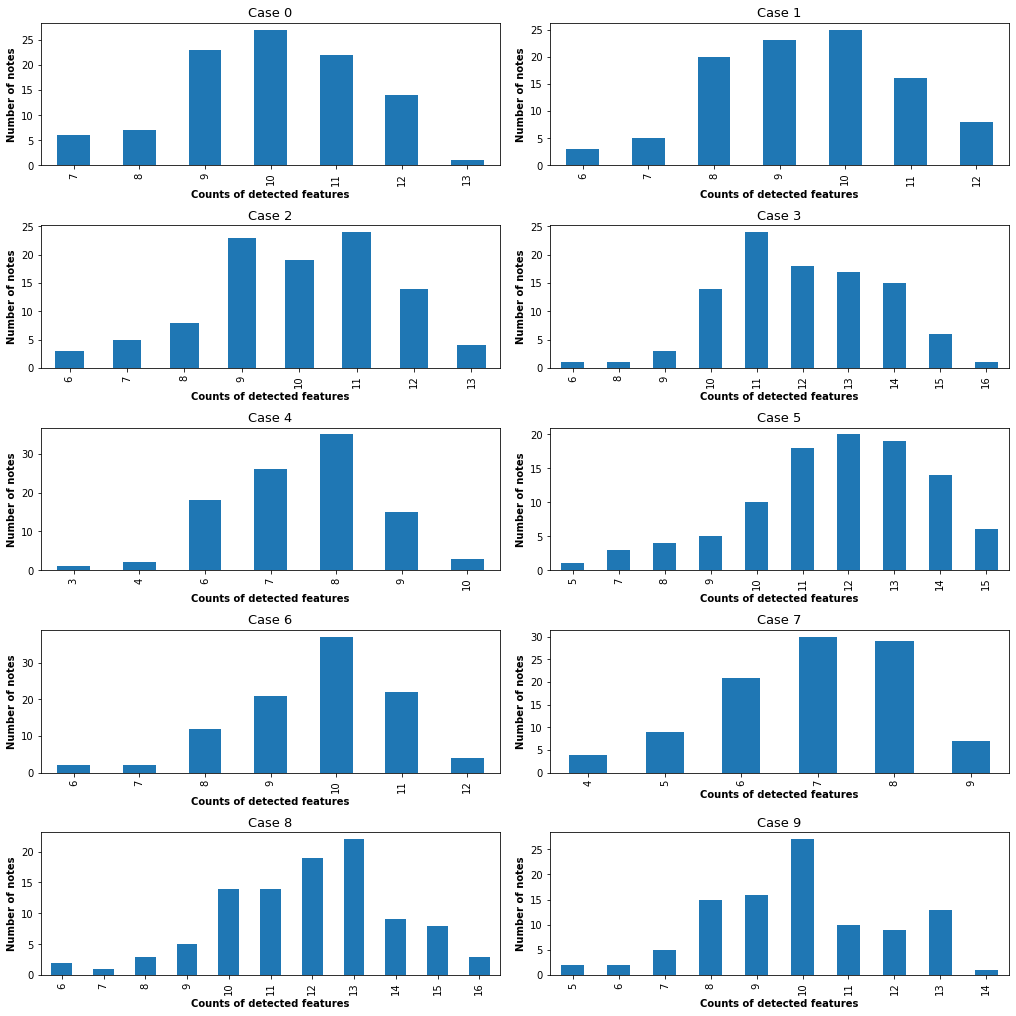

In [45]:
fig, ax = plt.subplots(ncols= 2, nrows =5, figsize = (14,14), constrained_layout = True)
index = 0
ax = ax.flatten()

for i in np.arange(10):
  case_i = df_train[df_train.case_num == i]
  case_i = case_i[case_i.annotation != '[]']
  case_i.groupby(['pn_num']).feature_num.count().sort_values().value_counts(sort=False).plot(kind='bar',ax=ax[index]).set_title(f"Case {i}", fontsize=13)
  ax[index].set_xlabel('Counts of detected features', weight="bold")
  ax[index].set_ylabel("Number of notes", weight="bold")
  index += 1


#### *test.csv*

In [66]:
df_test.head(20)

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


### **Notebook\#1**
https://www.kaggle.com/code/odins0n/nbme-detailed-eda